In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

## Data Preprocessing

In [2]:
from sklearn.model_selection import train_test_split
boston_data=pd.DataFrame(load_boston().data,columns=load_boston().feature_names)
Y = load_boston().target
X = load_boston().data
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [3]:
# data overview
boston_data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [4]:
# standardizing data
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [5]:
train_data = pd.DataFrame(x_train)
train_data['price'] = y_train
train_data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,-0.405288,-0.505698,0.450782,-0.293069,-0.987550,-0.391421,-0.883408,0.748166,-0.643062,-0.713675,-1.057198,0.428858,-0.291408,21.7
1,-0.377901,-0.505698,-0.532794,-0.293069,-0.510591,0.031376,-1.360114,0.708068,-0.527624,-0.725760,0.588652,0.428858,-0.897694,23.0
2,-0.413647,2.021008,-1.202047,-0.293069,-1.294166,0.438825,-1.719422,1.079350,-0.989376,-0.858694,-1.240070,0.204256,-1.150194,29.1


In [6]:
x_test=np.array(x_test)
y_test=np.array(y_test)
# shape of test and train data matxis
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


## SGD on Linear Regression : SKLearn Implementation

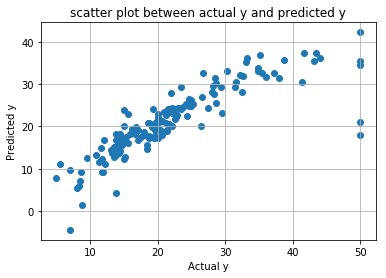

Mean Squared Error : 25.63931824395546
Mean Absolute Error : 2.9479243865089546
Wall time: 225 ms


In [7]:
%%time
# SkLearn SGD classifier
from sklearn.metrics import mean_absolute_error
clf_ = SGDRegressor()
clf_.fit(x_train, y_train)
plt.scatter(y_test,clf_.predict(x_test))
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, clf_.predict(x_test)))
print('Mean Absolute Error :',mean_absolute_error(y_test, clf_.predict(x_test)))

In [8]:
# SkLearn SGD classifier predicted weight matrix
sklearn_w = clf_.coef_
sklearn_w

array([-0.67223824,  0.62603241, -0.44609883,  1.18528637, -0.7827893 ,
        3.46668917, -0.44456024, -1.50700135,  0.53886041, -0.46976819,
       -1.60583215,  0.73918755, -2.89320448])

## Own SGD Implementation

In [9]:
# implemented SGD Classifier
# Source : https://towardsdatascience.com/linear-regression-using-gradient-descent-in-10-lines-of-code-642f995339c0
#Source : https://www.kaggle.com/arpandas65/simple-sgd-implementation-of-linear-regression

rate = 0.001
def CustomGradientDescentRegressor(train_data,rate,n_itr=1000,k=10):
    w_cur=np.zeros(shape=(1,train_data.shape[1]-1))
    b_cur=0
    cur_itr=1
    while(cur_itr<=n_itr):
        w_old=w_cur
        b_old=b_cur
        w_temp=np.zeros(shape=(1,train_data.shape[1]-1))
        b_temp=0
        temp=train_data.sample(k)
        y=np.array(temp['price'])
        x=np.array(temp.drop('price',axis=1))
        for i in range(k):
            w_temp += x[i]*(y[i]-(np.dot(w_old,x[i])+b_old))*(-2/k)
            b_temp += (y[i]-(np.dot(w_old,x[i])+b_old))*(-2/k)
        w_cur = w_old - rate * w_temp
        b_cur = b_old - rate * b_temp
        if(w_old==w_cur).all():
            break
        cur_itr+=1
    return w_cur,b_cur

# Predict function
def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)

# Plot function
def plot_(test_data,y_pred):
    plt.scatter(test_data,y_pred)
    plt.grid()
    plt.title('scatter plot between actual y and predicted y')
    plt.xlabel('actual y')
    plt.ylabel('predicted y')
    plt.show() 

## Hyper Parameter tunning for optimal Learning rate

In [11]:
# Funtion to get optimal learning rate on the implemented SGD Classifier

from math import log
x1_train,x1_test,y1_train,y1_test=train_test_split(X,Y,test_size=0.3)
x1_train,x1_cv,y1_train_,y1_cv_=train_test_split(x1_train,y1_train,test_size=0.3)

x1_train = scaler.transform(x1_train)
x1_cv = scaler.transform(x1_cv)

x1_train_= np.array(x1_train)
x1_train_data = pd.DataFrame(x1_train)
x1_train_data['price']=y1_train_

x1_cv_data=pd.DataFrame(x1_cv)
x1_cv_data['price']=y1_cv_

y1_train_=np.array(y1_train_)
y1_cv_=np.array(y1_cv_)
#print(y1_cv_.shape)

def tuneParams_learning_rate():
    train_error=[]
    cv_error=[]
    r=[0.00001,0.0001,0.001,0.01,0.1]
    for itr in r:
        w,b=CustomGradientDescentRegressor(x1_train_data,itr,n_itr=1000)
       # print(w.shape,b.shape,x1_train_.shape)
        y1_pred_train = predict(x1_train_,w,b)
        train_error.append(mean_squared_error(y1_train_,y1_pred_train))
        w,b = CustomGradientDescentRegressor(x1_cv_data,itr,n_itr=1000)
        y1_pred_cv = predict(x1_cv,w,b)
        cv_error.append(mean_squared_error(y1_cv_,y1_pred_cv))
    return train_error,cv_error 


In [12]:
train_error, cv_error = tuneParams_learning_rate()

In [13]:
print(train_error)
print(cv_error)

[582.8153634455225, 400.2840038653538, 31.6496445963517, 20.92126381428831, 24.221123022090087]
[481.21323638688665, 342.05838367838925, 26.4622712472684, 11.459374820395158, 16.643842462311127]


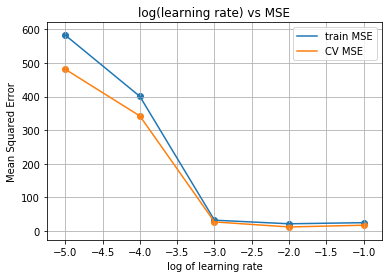

In [14]:
# plotting obtained values

import math
r = [0.00001,0.0001,0.001,0.01,0.1]
x1 = [math.log10(i) for i in r]
plt.plot(x1,train_error,label='train MSE')
plt.plot(x1,cv_error,label='CV MSE')
plt.scatter(x1,train_error)
plt.scatter(x1,cv_error)
plt.legend()
plt.xlabel('log of learning rate')
plt.ylabel('Mean Squared Error')
plt.title('log(learning rate) vs MSE')
plt.grid()
plt.show()

## SGD with optimal learning rate

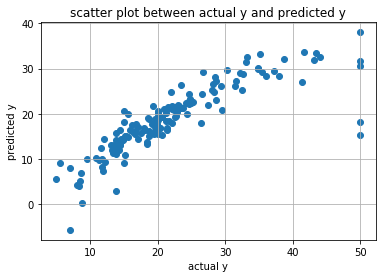

In [16]:
# Run implemented SGD Classifier with obtained optimal learning rate
# Rate = 0.001
w,b = CustomGradientDescentRegressor(train_data,0.001,n_itr=1000)
y_pred=predict(x_test,w,b)
plot_(y_test,y_pred)

In [17]:
# Errors in implemeted model
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

36.242307810327304
3.643693591831009


In [18]:
# weight vector obtained from impemented SGD Classifier
custom_w = w
custom_w

array([[-0.68478642,  0.59038731, -0.52916363,  1.0640511 , -0.51479051,
         3.16516436, -0.32172652, -1.1743982 ,  0.28927085, -0.51066355,
        -1.33627809,  0.81646833, -2.6008997 ]])

## Comparing Models

In [19]:
from prettytable import PrettyTable
# MSE = mean squared error
# MAE = mean absolute error
x=PrettyTable()
x.field_names=['Model','Weight Vector','MSE','MAE']
x.add_row(['sklearn',sklearn_w,mean_squared_error(y_test, clf_.predict(x_test)),mean_absolute_error(y_test, clf_.predict(x_test))])
x.add_row(['custom',custom_w,mean_squared_error(y_test,y_pred),(mean_absolute_error(y_test,y_pred))])
print(x)

+---------+---------------------------------------------------------------------------+--------------------+--------------------+
|  Model  |                               Weight Vector                               |        MSE         |        MAE         |
+---------+---------------------------------------------------------------------------+--------------------+--------------------+
| sklearn |  [-0.67223824  0.62603241 -0.44609883  1.18528637 -0.7827893   3.46668917 | 25.63931824395546  | 2.9479243865089546 |
|         |   -0.44456024 -1.50700135  0.53886041 -0.46976819 -1.60583215  0.73918755 |                    |                    |
|         |                                -2.89320448]                               |                    |                    |
|  custom | [[-0.68478642  0.59038731 -0.52916363  1.0640511  -0.51479051  3.16516436 | 36.242307810327304 | 3.643693591831009  |
|         |   -0.32172652 -1.1743982   0.28927085 -0.51066355 -1.33627809  0.81646833 |   

Comparison Between top 10 predicted value of both models :

In [21]:
sklearn_pred=clf_.predict(x_test)
implemented_pred=y_pred
x=PrettyTable()
x.field_names=['SKLearn SGD predicted value','Implemented SGD predicted value']
for itr in range(10):
    x.add_row([sklearn_pred[itr],implemented_pred[itr]])
print(x)

+-----------------------------+---------------------------------+
| SKLearn SGD predicted value | Implemented SGD predicted value |
+-----------------------------+---------------------------------+
|      18.113790685388672     |        16.45100663163098        |
|      12.355935022314585     |        9.899678371123564        |
|      24.324240648854058     |        21.84327510047179        |
|      17.708648056652095     |        15.697845959793602       |
|      16.553207743719863     |        15.048634913437628       |
|      24.06713523358354      |         21.5811126414218        |
|      25.238127234891195     |        22.397391422495897       |
|      18.018108179189802     |        15.292183798728987       |
|      33.16182090475766      |        29.886879091832352       |
|      18.709239456891392     |        16.038386380811964       |
+-----------------------------+---------------------------------+
